### Darlene Phan
August 11, 2022<br>
Project 2

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.shape

(7500, 11)

NV stands for non vintage, which means that they are blends of multiple years. This does affect the price and possible rating of the wine. Since this doesn't fall in line with the other int in this column its best to drop so we don't have mixed data or create a bias

In [4]:
#Changing categorical values of N.V. to nan. 
df['year'] = df['year'].replace('N.V.', np.NaN)

In [5]:
df.year.unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       nan, '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', '2006', '2000', '2003', '2002',
       '1991', '1994', '1990', '1989', '1987', '1986', '1981', '2001',
       '1968', '1964', '1982', '1974', '1983', '1955', '1980', '1972',
       '1953', '1958', '1942', '1965', '1992', '1973', '1997', '1967',
       '1975', '1910', '1961', '1954', '1988', '1969', '1951', '1928',
       '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [6]:
#checking and dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
#checking for null/missing values
df.isnull().sum()

winery           0
wine             0
year            72
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Dropping missing values in year as discussed earlier. Dropping type, because that's not something should be imputed since it greatly impacts the possible rating of the wine.

'body' and 'acidity' will be handled differently

In [8]:
#Dropping missing values
df.dropna(subset=['type','year'], inplace=True)

In [9]:
#confirming 'type' and 'year' columns have been dropped
df.isnull().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
country          0
region           0
price            0
type             0
body           163
acidity        163
dtype: int64

In [10]:
#Correcting object type after dropping duplicates
df['year'] = df['year'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1877 non-null   object 
 1   wine         1877 non-null   object 
 2   year         1877 non-null   int64  
 3   rating       1877 non-null   float64
 4   num_reviews  1877 non-null   int64  
 5   country      1877 non-null   object 
 6   region       1877 non-null   object 
 7   price        1877 non-null   float64
 8   type         1877 non-null   object 
 9   body         1714 non-null   float64
 10  acidity      1714 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 176.0+ KB


In [12]:
#Delete unnecessary colums
df = df.drop(columns=['num_reviews'])
df

,winery,wine,year,rating,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2046,Mustiguillo,Finca Terrerazo,2017,4.2,Espana,El Terrerazo,24.45,Red,4.0,3.0
2047,Matarromera,Gran Reserva,2011,4.2,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
2048,Sei Solo,Preludio,2016,4.2,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
2049,Vinedos de Paganos,El Puntido,2005,4.2,Espana,Rioja,73.00,Rioja Red,4.0,3.0


In [13]:
df.describe()

,year,rating,price,body,acidity
count,1877.000000,1877.000000,1877.000000,1714.000000,1714.000000
mean,2010.869473,4.404688,142.612586,4.263127,2.928238
std,11.300344,0.148552,282.560181,0.660949,0.313328
min,1910.000000,4.200000,6.260000,2.000000,1.000000
25%,2010.000000,4.300000,32.550000,4.000000,3.000000
50%,2015.000000,4.400000,55.140000,4.000000,3.000000
75%,2017.000000,4.500000,117.300000,5.000000,3.000000
max,2021.000000,4.900000,3119.080000,5.000000,3.000000


In [14]:
#copy for machine learning
df_ml = df.copy()

Imputing mean for viz. Using this method because it makes more sense to fill it with an average to not skew the current data.

In [15]:
#imputing
df['body'] = df['body'].fillna(round(df['body'].mean()))
df['acidity'] = df['acidity'].fillna(round(df['acidity'].mean()))

## Exploratory Data Viz
Univariate visuals for the target and all features

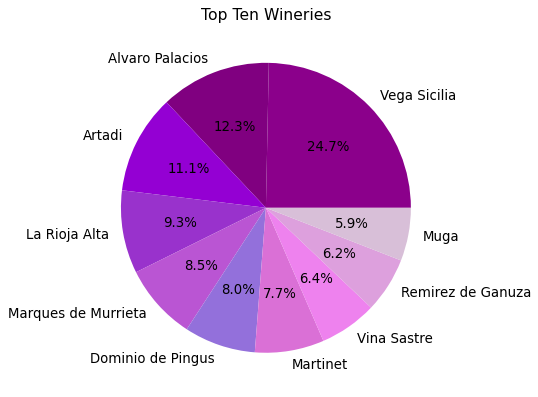

In [16]:
#Visualizing the top 10 Wineries
plt.figure(figsize=(8, 6), dpi=80)
c=['darkmagenta', 'purple', 'darkviolet', 'darkorchid', 'mediumorchid','mediumpurple', 'orchid', 'violet', 'plum', 'thistle']
df.winery.value_counts().sort_values(ascending=False).head(10).plot(kind='pie', 
                                                                    autopct='%1.1f%%', 
                                                                    colors=c,
                                                                    fontsize=12)
plt.ylabel('')
plt.title('Top Ten Wineries', fontsize=14)
plt.show()

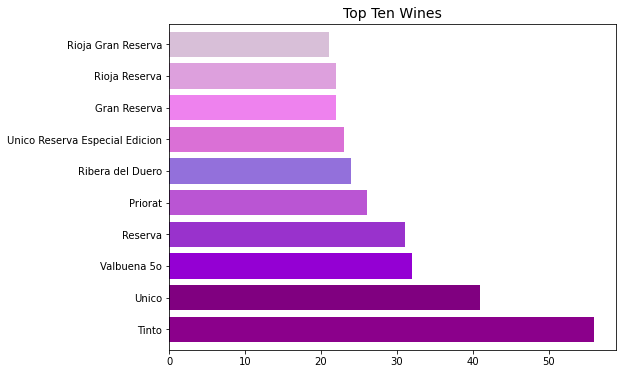

In [17]:
#top ten wines viz
plt.figure(figsize=(8, 6))
df.wine.value_counts(ascending=False).head(10).plot(kind='barh', width=.8, color=c)
plt.ylabel('')
plt.title('Top Ten Wines', fontsize=14)
plt.show()

Our first numerical column. Checking for outliers since years have a lot of different vintages

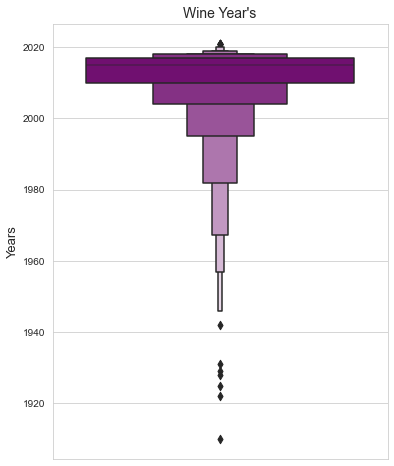

In [33]:
#Wine years outliers boxenplot
plt.figure(figsize=(6,8))
sns.set_style('whitegrid')
sns.boxenplot(data=df, y='year', color='purple')
plt.title("Wine Year's", fontsize=14)
plt.ylabel('Years', fontsize=13)
plt.show()

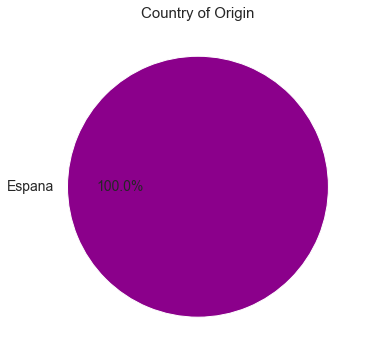

In [19]:
#lol, I'll be deleting this row. This was for my own amusement. 
#HOWEVER, 100% of the wines come from Spain. 
plt.figure(figsize=(8, 6))
df.country.value_counts().plot(kind='pie', autopct='%1.1f%%', fontsize=14, colors=c)
plt.ylabel(' ')
plt.title('Country of Origin', fontsize=15)
plt.show()

Interesting, turns out that the top regions for wine are taken up by 3 areas. 

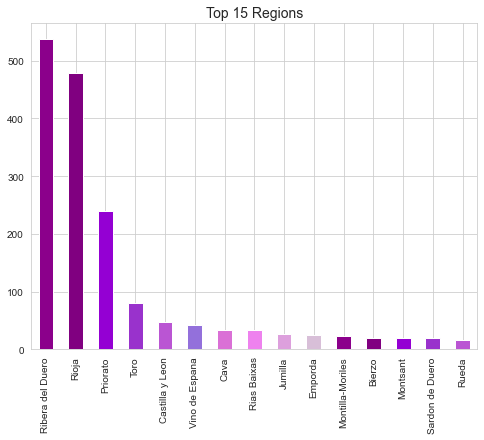

In [20]:
#Reigions bar plot
plt.figure(figsize=(8, 6))
df.region.value_counts().head(15).plot(kind='bar', color=c)
plt.title('Top 15 Regions', fontsize=14)
plt.show()

A deeper dive shows us that the lower 50% has less that 5 wines per reigon. Which means the top 3 are majority outliers. Curious as to how many unique wineries are in these locations and how many of them are mass produced.

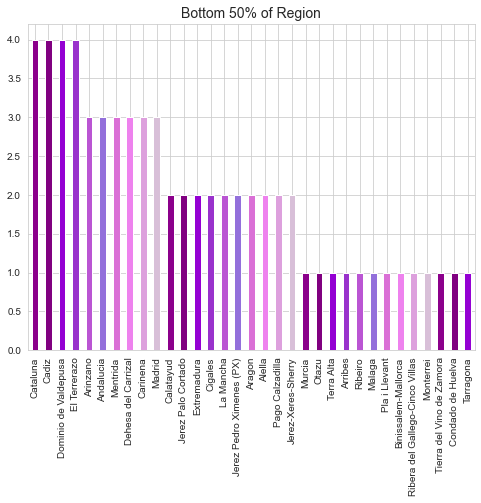

In [21]:
#bottom 50% bar plot
plt.figure(figsize=(8, 6))
df.region.value_counts().tail(33).plot(kind='bar', color=c)
plt.title('Bottom 50% of Region', fontsize=14)
plt.show()

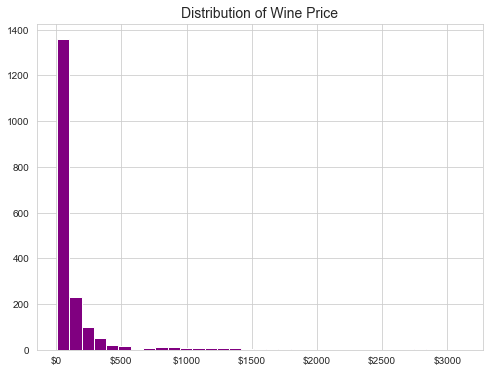

In [22]:
#Wine price distribution
fig, ax = plt.subplots(figsize=(8, 6))
n_bins = 33
ax.hist(df['price'], 
        n_bins, 
        color='purple',
        histtype ='bar')
plt.title('Distribution of Wine Price', fontsize=14)
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.show()

Types of wine had the least categories out of all the categorical columns. I was able to plot all of them without it visually being overwhelming. Majority of the wines in this data set are red wines, hence the purplish color palette. 

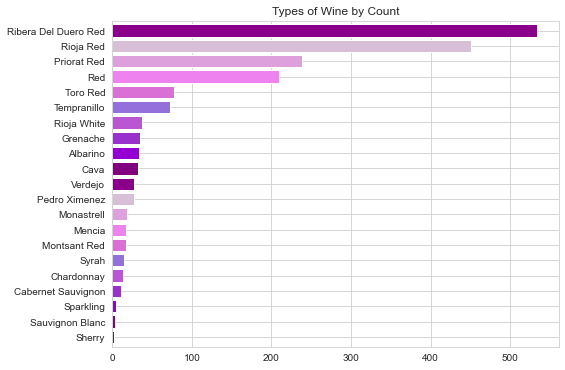

In [23]:
plt.figure(figsize=(8, 6))
df.type.value_counts().sort_values(ascending=True).plot(kind='barh', width=.8, color=c)
plt.title('Types of Wine by Count')
plt.show()

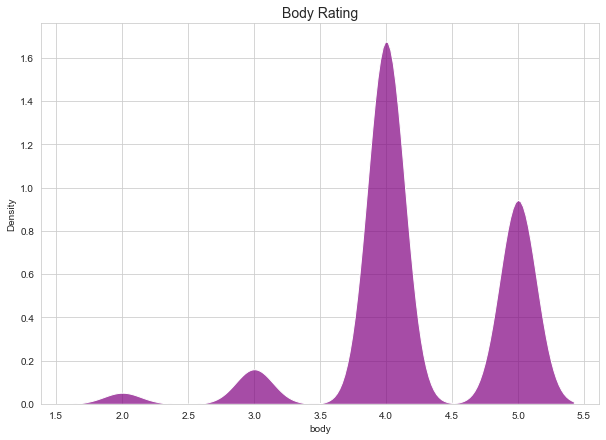

In [24]:
#Body rating distribution
plt.figure(figsize=(10,7))
sns.kdeplot(data=df, x="body", multiple='stack', color='purple', alpha=.7)
plt.title('Body Rating', fontsize=14)
plt.show()

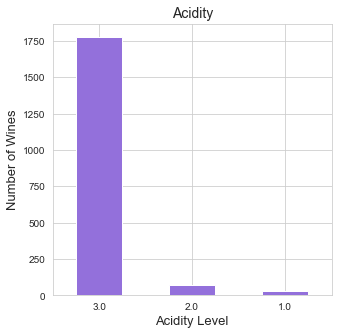

In [72]:
#Acidity Distribution
plt.figure(figsize=(5,5))
df['acidity'].value_counts().plot(kind='bar', color='mediumpurple', width=.5)
plt.title('Acidity', fontsize=14)
plt.xlabel('Acidity Level', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Number of Wines', fontsize=13)
plt.show()

### The target

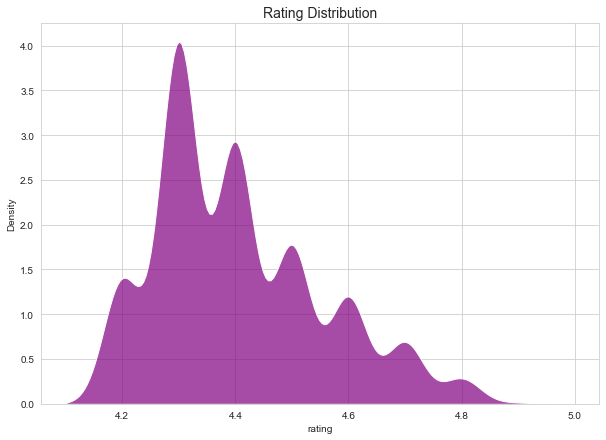

In [26]:
#Distribution of wine rating. 
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.kdeplot(data=df, x="rating", multiple='stack', color='purple', alpha=.7)
plt.title('Rating Distribution', fontsize=14)
plt.show()

I have 15+ years of hospitality experience, and was able to correlate what I already knew about Spanish wines to these visuals. It was not surprising to find out that majority of Spanish wines have higher acidity levels(great for cutting through fatty foods), medium-full body (will hold up against food) and natrually very good mean rating between 4.3 - 4.7. 

Most wines are enjoyed with food. Since Spanish wines have characteristics that allow them to stand up to food and not be washed out, it's understandable why the majority of these ratings are as high as they are. I always knew, Spanish wines were great with food, I never realized that the majority of them had similar characteristics regardless of types or reigons. Situations like this is where my domain expertise will shine.

Based on my background and visualizations, there are a couple different ways we could approach wine ratings. Since there are so many wine types, regions, on top of dropped rows that had missing wine types, there is always room for us to go back and create a more specific ML learning model. One that could be more focused on the regions of Spain or the types of wines. But for now, we will work on a ML model for the wines as a whole

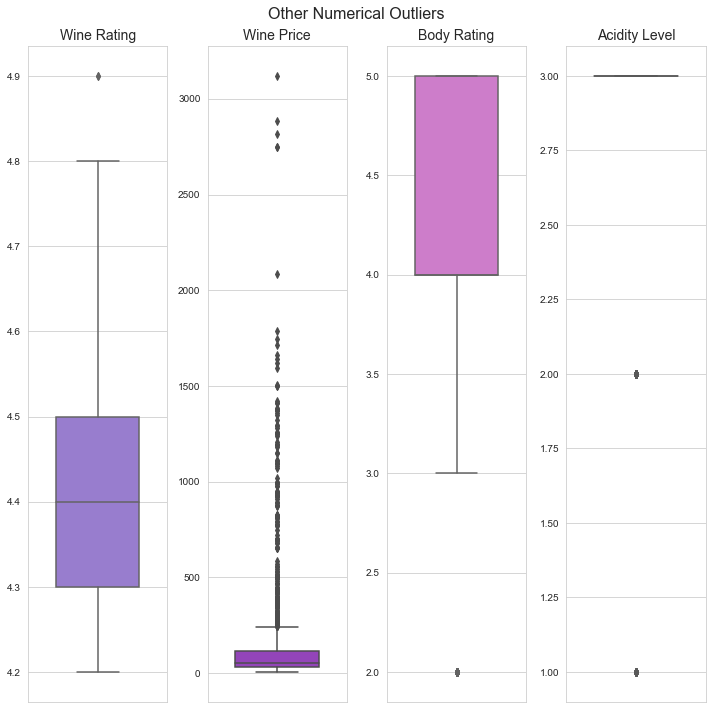

In [74]:
large = 14
plt.rc('axes', labelsize=large)
f, axes = plt.subplots(1,4, figsize=(10,10))

ax1=sns.boxplot(y='rating', data=df, ax=axes[0], color='mediumpurple', width=.6)
axes[0].set_title('Wine Rating', fontsize=large)
plt.ylabel('')
sns.boxplot(y='price', data=df, ax=axes[1], color='darkorchid', width=.6)
axes[1].set_title('Wine Price', fontsize=large)

sns.boxplot(y='body', data=df, ax=axes[2], color='orchid', width=.6)
axes[2].set_title('Body Rating', fontsize=large)

sns.boxplot(y='acidity', data=df, ax=axes[3], color='mediumorchid', width=.6)
axes[3].set_title('Acidity Level', fontsize=large)

plt.suptitle('Other Numerical Outliers', fontsize=16)

#hide y axis label
for ax in axes.flat:
    ax.set(xlabel='', ylabel='')
plt.tight_layout()
plt.show()

### Resubmit
itendify outliers for all nummeric columns<br>
Displayed above. <br>
<b> Rating</b> : Outlier rating on the top end reaching 4.9<br>
<b> Price</b> : Majority of wines fall within the 0-125 dollar range. Everything above 300 is an outlier. The range of pricing goes past the 3k mark but overall majoirty is within the 125 range.  <br>
<b>Body</b> : Outlier low rating at 2.0.<br>
<b>Acidity</b> :The reason there was not an indication previously for acidity having any outliers is because these would be considered as abnormal range. Acidity is ordinal encoded and have only 3 options (1,2,3) for acidity levels. Whereas price, has an infinate range. Determining outliers means that the points should be extremely high or extremely low data points relative to the nearest data point and the rest of the neighboring coexisting values. Acidity only has 3 steps. The outlier for price would be 2,900 from the average data point. 

### Multivariate EDA to identify any moderate or strong correlations

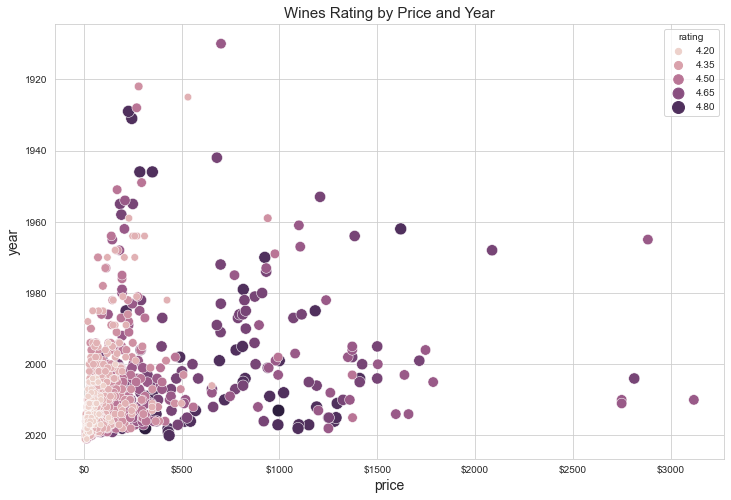

In [51]:
#scatterplot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df, x='price', y='year', hue='rating', s=65, size="rating", sizes=(40, 160))
plt.gca().invert_yaxis()
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.title('Wines Rating by Price and Year', fontsize=15)
plt.show()

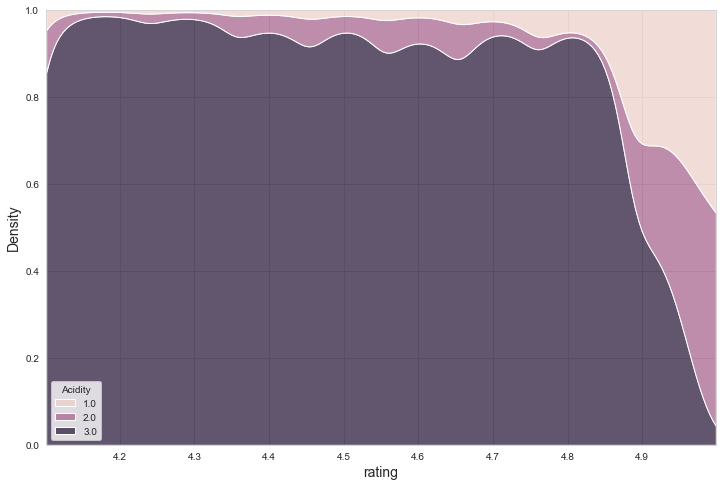

In [70]:
#kde plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.kdeplot(data=df, x="rating", hue="acidity", multiple="fill")
sns.move_legend(ax, "lower left", title='Acidity')
plt.title('')
plt.show()

### Project 2 part 3 Summary
<b>Scatterplot</b> : To my surprise, I thought that the older wine vintages would have had higher price tags. Tunrs out that the higher priced wines were between 2000 - 2011. The ratings for the wines were still within 4.5-4.8, which was a fairly common range for the majority of the higher priced wines. I'm curious as to what the harvest was like during those years, because that could greatly affect the wine availability. Sometimes poor harvest years can lead to higher priced wines due to scarcity of quality wines that year. 
<br><br>
<b>KDE Plot</b>: Demonstrates that regardless of rating, the majority had an acidity level of 3. However, there's still a fairly consistent distribution of lower/med acidic wines throughout the wine rating.